# **Bank Churn Prediction Project**

### **Problem Definition**
Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

### **Objective**
Build a neural network-based classifier that can determine whether customers will leave or not in the next 6 months.

### **Data Dictionary**
* CustomerId: Unique ID which is assigned to each customer
* Surname: Last name of the customer 
* CreditScore: It defines the credit history of the customer.  
* Geography: A customer’s location    
* Gender: It defines the Gender of the customer   
* Age: Age of the customer     
* Tenure: Number of years for which the customer has been with the bank
* NumOfProducts: It refers to the number of products that a customer has purchased through the bank.
* Balance: Account balance
* HasCrCard: It is a categorical variable that decides whether the customer has a credit card or not.
* EstimatedSalary: Estimated salary 
* isActiveMember: It is a categorical variable that decides whether the customer is an active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions, etc )
* Exited: It is a categorical variable that decides whether the customer left the bank within six months or not. It can take two values: 0=No (Customer did not leave the bank), 1=Yes (Customer left the bank)

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## **Import Pertinent Libraries**

In [2]:
# import main libraries as appropriate

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import model_selection
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)

from tensorflow import keras
import tensorflow as tf
# from tf.keras.optimizers import Adam
# from tf.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout, BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras import backend

import warnings
warnings.filterwarnings("ignore")

## **Inspect Dataset**

In [3]:
import pandas as pd
cust_data = pd.read_csv('/content/drive/My Drive/Churn.csv')   # load dataset

In [4]:
data = cust_data.copy()   # copy data to avoid changes to original dataset

In [5]:
data.shape   # check data shape (rows and columns)

(10000, 14)

In [6]:
data.head()   # check first 5 rows

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
data.tail()   # check last 5 rows

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [8]:
data.sample(5)   # check data sample

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1499,1500,15583595,Tao,461,France,Female,28,8,0.00,1,1,1,103349.74,0
8931,8932,15761487,Yefimova,678,France,Female,55,5,0.00,1,0,1,196794.11,1
9648,9649,15797190,Charlton,608,Germany,Female,40,7,96202.32,1,0,0,161154.85,0
1559,1560,15671032,He,760,Germany,Male,42,0,77992.97,2,1,1,97906.38,0
520,521,15671256,Macartney,850,France,Female,35,1,211774.31,1,1,0,188574.12,1


In [9]:
data.info()   # check for missing values and feature data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
data.isnull().sum()   # confirm no missing values 

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
data.nunique()   # check number of unique values for each feature

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [12]:
# drop below columns since they offer no analytical value and may add meaningless bias

data.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace=True)

In [13]:
# check unique value counts for each class in feature

cols = ['Geography', 'Gender', 'Age', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']

for columns in cols:
    print("Unique values in column", columns, ":")
    print(data[columns].value_counts())
    print("-" * 40)

Unique values in column Geography :
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
----------------------------------------
Unique values in column Gender :
Male      5457
Female    4543
Name: Gender, dtype: int64
----------------------------------------
Unique values in column Age :
37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: Age, Length: 70, dtype: int64
----------------------------------------
Unique values in column Tenure :
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64
----------------------------------------
Unique values in column NumOfProducts :
1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64
----------------------------------------
Unique values in column HasCrCard :
1    7055
0    2945
Name: HasCrCard, dtype: int64
----------------------------------

In [14]:
data.describe().T   # check statistical summary of numerical features

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


#### **Observations**

*   9 numerical features and 2 categorical features.
*   No missing values.
*   No indication of extreme outliers of nonsensical data.
*   Target variable Exited is imbalanced with about 80% stayed customers and 20% exited customers.


## **Exploratory Data Analysis**

### **Univariate Analysis**

In [15]:
# function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):

    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="teal"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

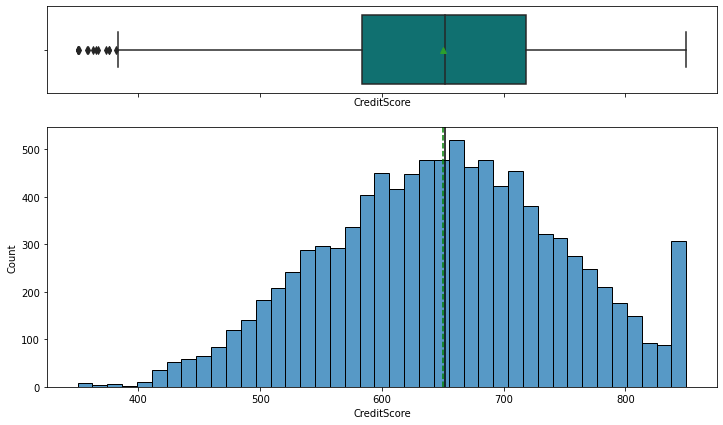

In [16]:
# plot histogram boxplots for all numerical features

histogram_boxplot(data, "CreditScore")

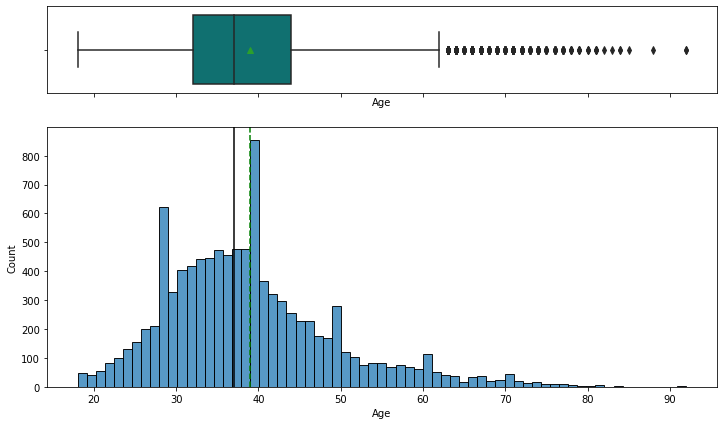

In [17]:
histogram_boxplot(data, "Age")

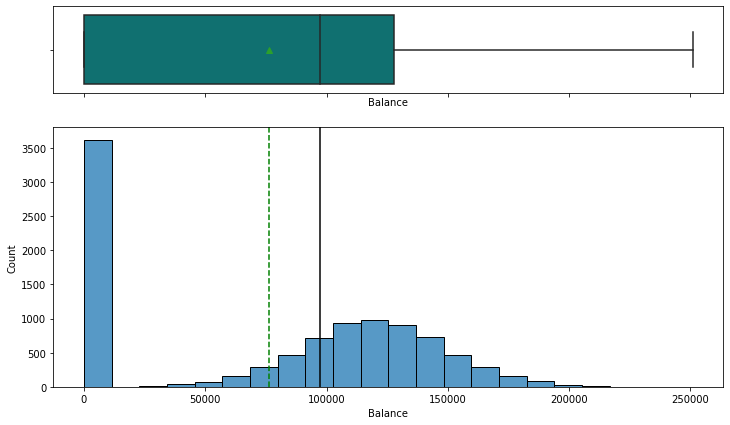

In [18]:
histogram_boxplot(data, "Balance")

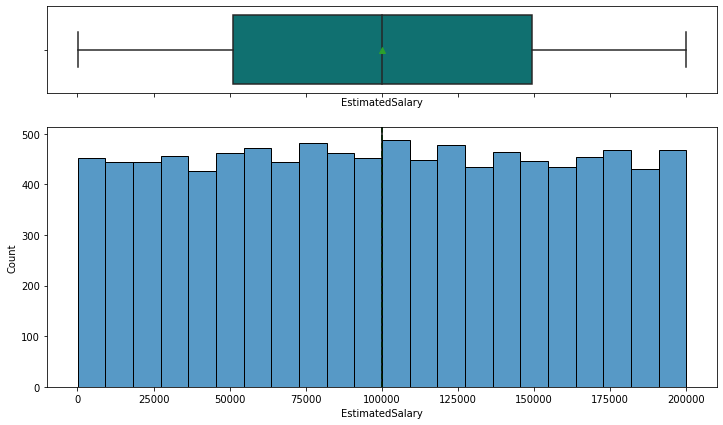

In [19]:
histogram_boxplot(data, "EstimatedSalary")

In [20]:
# function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

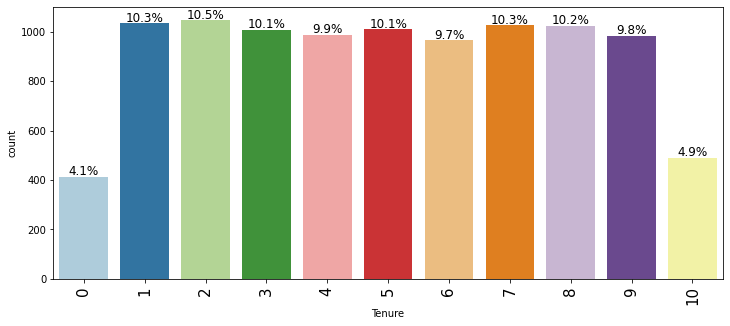

In [21]:
labeled_barplot(data, "Tenure", perc=True)

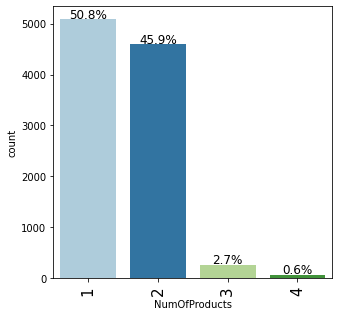

In [22]:
labeled_barplot(data, "NumOfProducts", perc=True)

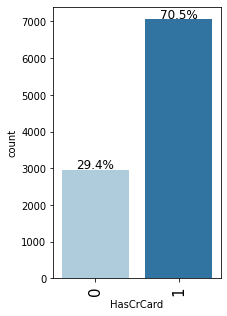

In [23]:
labeled_barplot(data, "HasCrCard", perc=True)	

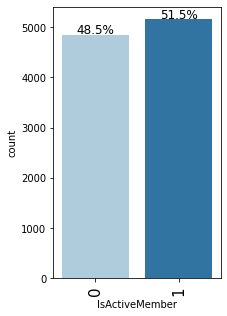

In [24]:
labeled_barplot(data, "IsActiveMember", perc=True)	

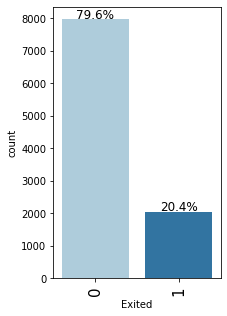

In [25]:
labeled_barplot(data, "Exited", perc=True)	

#### **Observations**

*   Mean credit score is about 650.
*   Age is right skewed with mean age at about 39.
*   Mean credit card balance is about 76485.
*   Estimated salary is uniform across payscales.
*   Tenure for most customers is between 1-9 years with bank. 
*   Majority of customers have 1-2 products.
*   70% of customers have a credit card with bank. 
*   About half of customers are active with bank.
*   Target variable class is imbalanced with 80% staying and 20% exiting.

## **Bivariate Analysis**

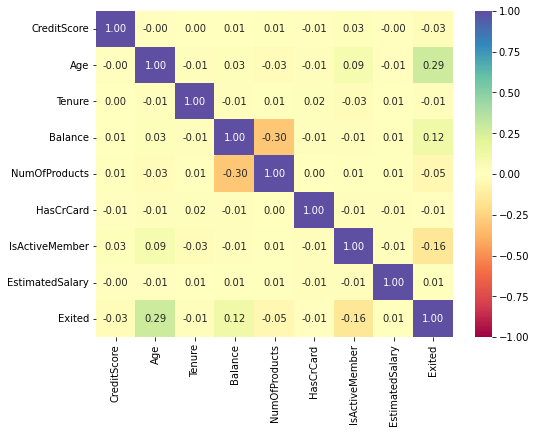

In [26]:
# plot heatmap to check for correlations

plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

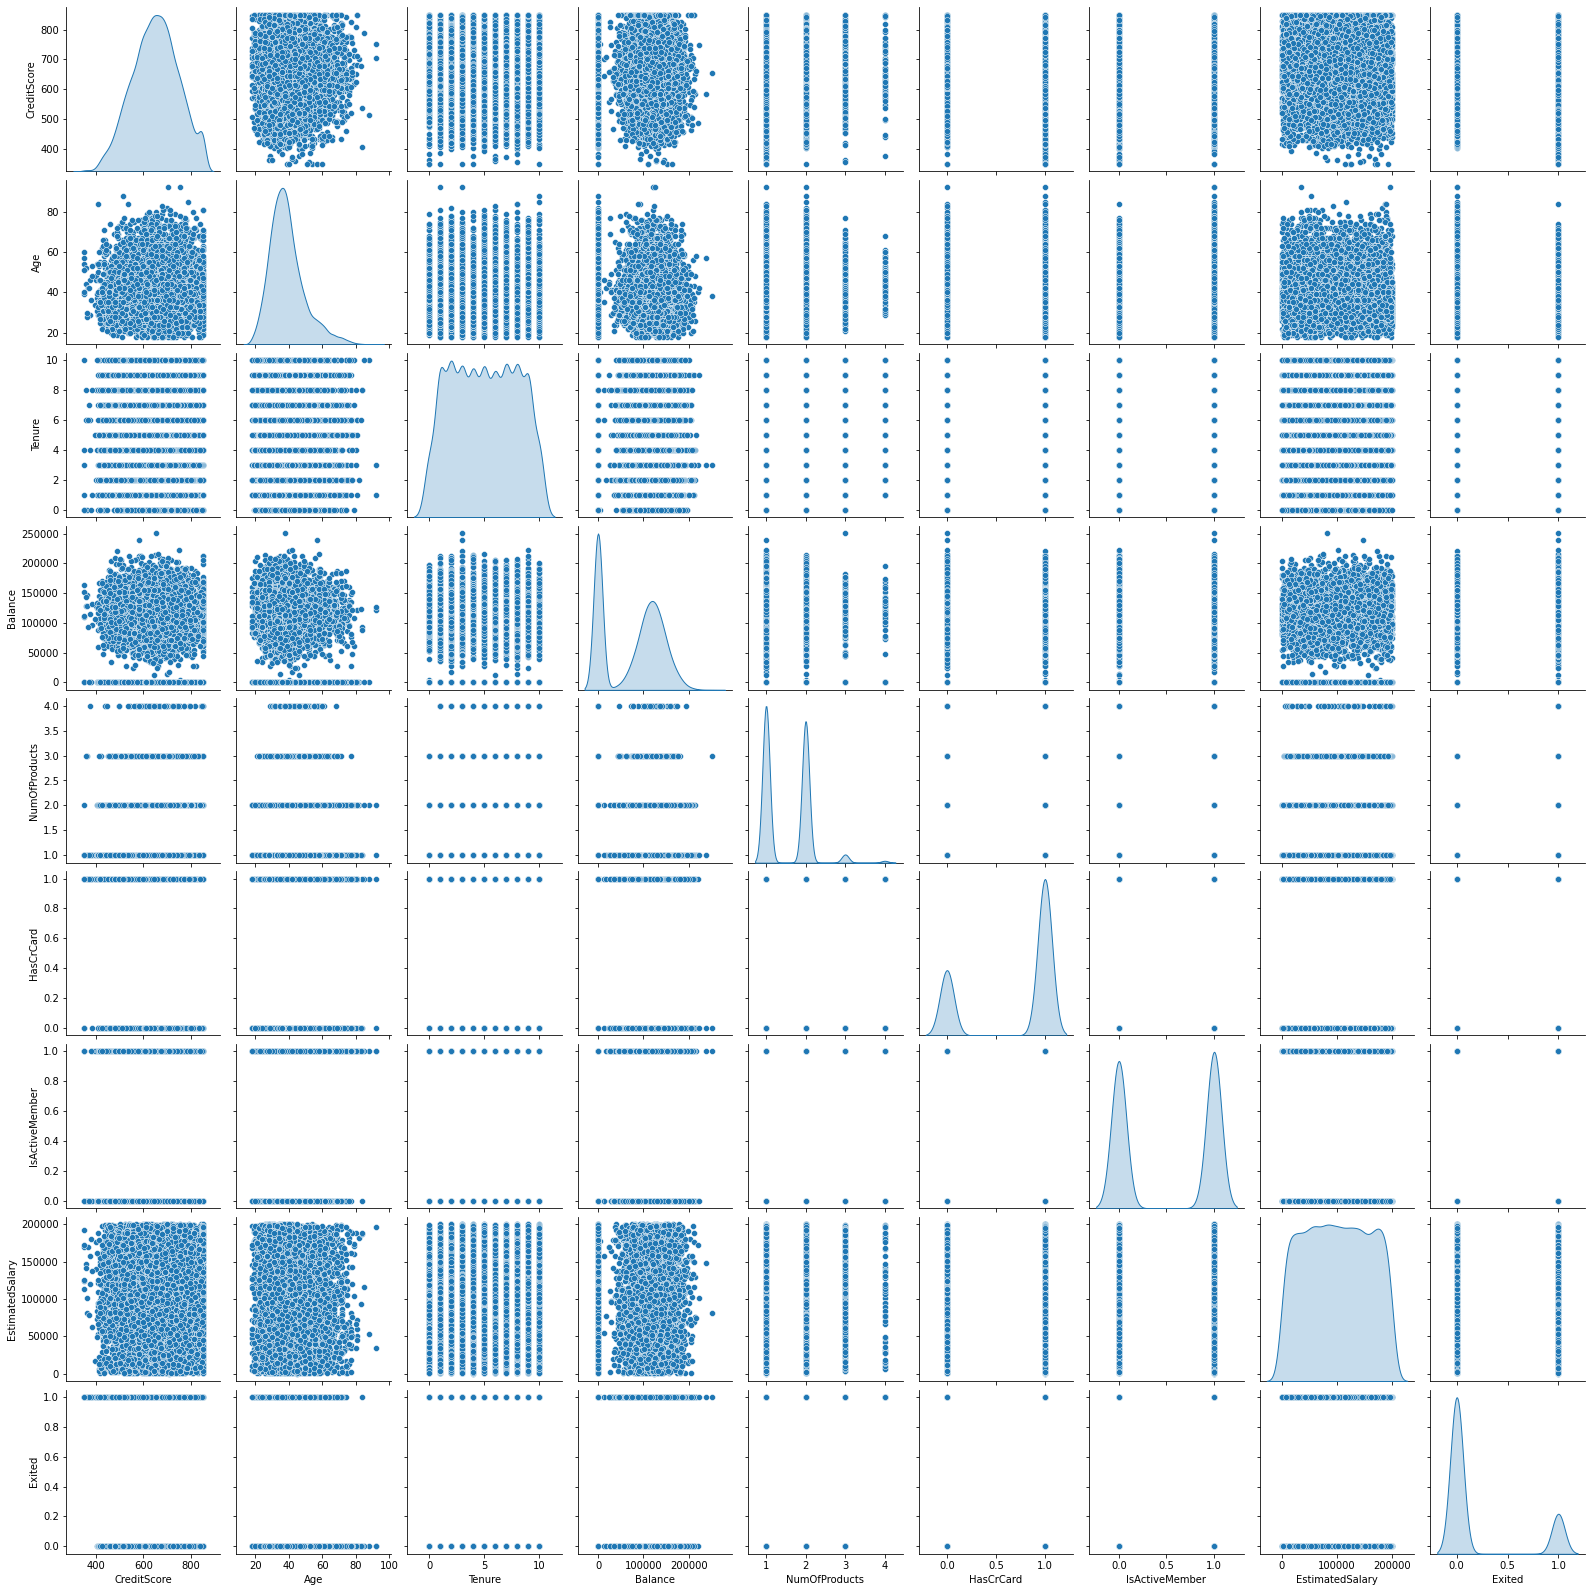

In [27]:
sns.pairplot(data=data, diag_kind="kde")   # check correlation pair plots
plt.show()

In [28]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


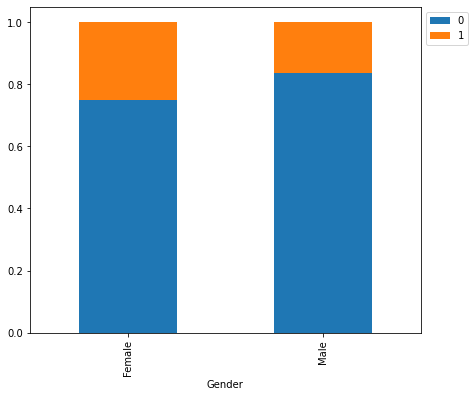

In [29]:
stacked_barplot(data, 'Gender', 'Exited')

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


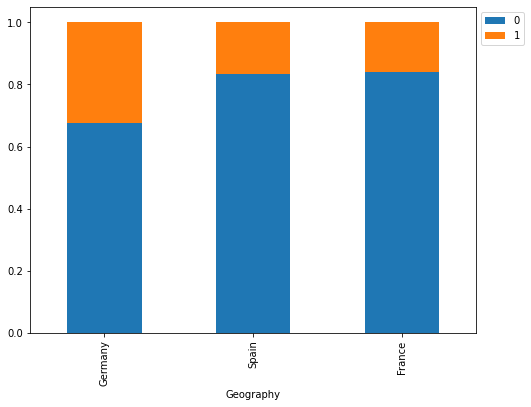

In [30]:
stacked_barplot(data, 'Geography', 'Exited')

Exited     0     1    All
Tenure                   
All     7963  2037  10000
1        803   232   1035
3        796   213   1009
9        771   213    984
5        803   209   1012
4        786   203    989
2        847   201   1048
8        828   197   1025
6        771   196    967
7        851   177   1028
10       389   101    490
0        318    95    413
------------------------------------------------------------------------------------------------------------------------


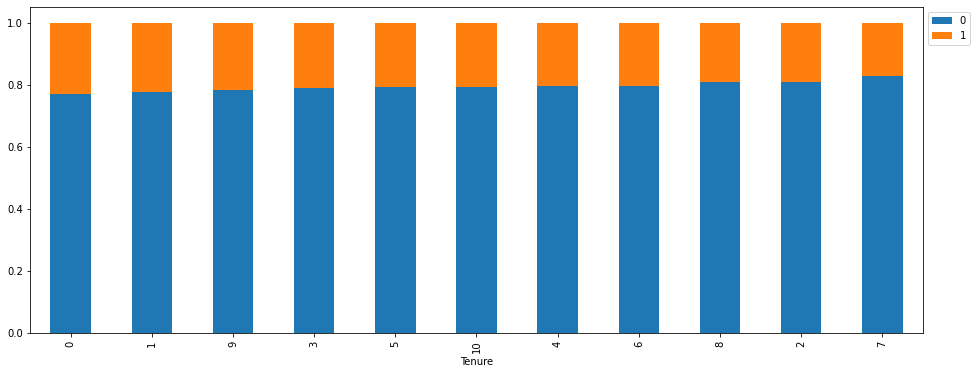

In [31]:
stacked_barplot(data, 'Tenure', 'Exited')

Exited            0     1    All
NumOfProducts                   
All            7963  2037  10000
1              3675  1409   5084
2              4242   348   4590
3                46   220    266
4                 0    60     60
------------------------------------------------------------------------------------------------------------------------


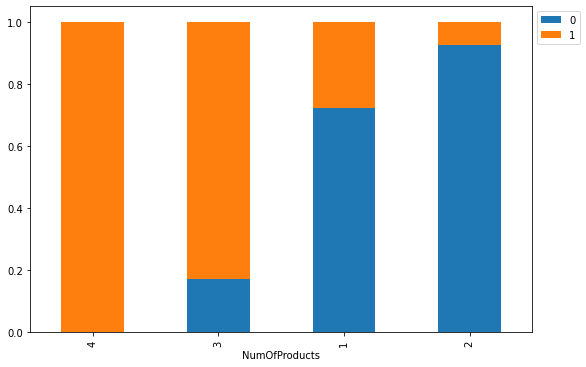

In [32]:
stacked_barplot(data, 'NumOfProducts', 'Exited')

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


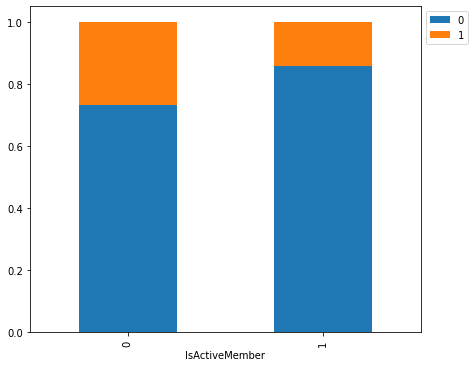

In [33]:
stacked_barplot(data, 'IsActiveMember', 'Exited')

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


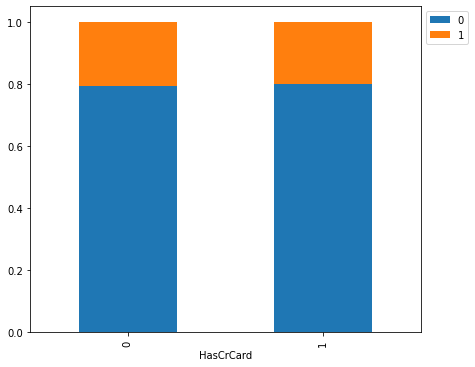

In [34]:
stacked_barplot(data, 'HasCrCard', 'Exited')

#### **Observations**

*   Slight positive correldation between Age and customers exiting. 
*   Female customers more likely to exit.
*   Customers based in Germany are inclined to exit.
*   Customers with < 1 year of tenure more likely to exit
*   Customers with more products more likely to exit.
*   Active customers less likely to exit. 

## **Data Pre-Processing**

In [35]:
# separate the independent and dependent variables

X = data.drop(['Exited'], axis=1)   # independent variables
y = data['Exited']

In [36]:
# split data into training and testing set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [37]:
# check shapes of train and test sets

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 10)
(2000, 10)
(8000,)
(2000,)


In [38]:
# verify class percentages for each set

print("Training Set: \n", y_train.value_counts(normalize=True))
print("\nTest Set: \n", y_test.value_counts(normalize=True))

Training Set: 
 0    0.79325
1    0.20675
Name: Exited, dtype: float64

Test Set: 
 0    0.8085
1    0.1915
Name: Exited, dtype: float64


In [39]:
# one-hot encoding for categorical variables

cat_cols = ['Gender', 'Geography']
X_train = pd.get_dummies(X_train, columns=cat_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=cat_cols, drop_first=True)

In [40]:
X_train.head()   # check dataset after one-hot encoding

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male,Geography_Germany,Geography_Spain
2714,665,55,8,136354.16,1,1,1,93769.89,0,0,0
8159,461,25,6,0.00,2,1,1,15306.29,0,0,1
4620,680,33,2,108393.35,1,0,1,39057.67,1,0,0
3172,665,32,1,132178.67,1,0,0,11865.76,1,1,0
2632,638,48,2,0.00,2,1,1,7919.08,1,0,1


In [41]:
# scale the data before building the model

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## **Model Evaluation Criterion**
**Model can make wrong predictions as:**
- Case 1: Predicting that a customer will leave when they actually stay (Loss of Resource).
- Case 2: Predicting that a customer will stay when they actually leave (Loss of Opportunity).

**Which case is more important?**

Case 2 is more important since the objective is to effectively determine which customers will leave.

**Which metric to optimize?**

The objective is to minimize Loss of Opportunity (i.e. False Negatives). Hence the correct metric to gauge model performance should be Recall. Since data is imbalanced it may not be advisable to use Accuracy. Therefore we need to maximize Recall and also we can keep an eye on improving Precision and F1 score as well.

## **Neural Network Model Building**

### **Model 1 - Simple Neural Network with SGD Optimizer**

In [42]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [43]:
model1 = Sequential()   #initialize the model
model1.add(Dense(units=16, input_dim=11, activation='relu'))   # input layer with 11 inputs and first hidden layer
model1.add(Dense(units=8, activation='relu'))   # hidden layer
model1.add(Dense(1, activation='sigmoid'))   # output layer with sigmoid function  

In [44]:
# compile the model
model1.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

In [45]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                192       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________


In [46]:
history1 = model1.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
200/200 [==============================] - 1s 3ms/step - loss: 0.5568 - accuracy: 0.7730 - val_loss: 0.5136 - val_accuracy: 0.8006
Epoch 2/50
200/200 [==============================] - 0s 2ms/step - loss: 0.5087 - accuracy: 0.7914 - val_loss: 0.4834 - val_accuracy: 0.8006
Epoch 3/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4850 - accuracy: 0.7911 - val_loss: 0.4655 - val_accuracy: 0.8000
Epoch 4/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4698 - accuracy: 0.7903 - val_loss: 0.4540 - val_accuracy: 0.8000
Epoch 5/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4600 - accuracy: 0.7922 - val_loss: 0.4469 - val_accuracy: 0.8025
Epoch 6/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4530 - accuracy: 0.7970 - val_loss: 0.4415 - val_accuracy: 0.8000
Epoch 7/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4477 - accuracy: 0.8006 - val_loss: 0.4370 - val_accuracy: 0.8006
Epoch 

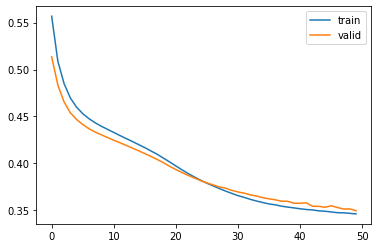

In [47]:
# Capturing learning history per epoch
hist1 = pd.DataFrame(history1.history)
hist1['epoch'] = history1.epoch

# Plotting accuracy at different epochs
plt.plot(hist1['loss'])
plt.plot(hist1['val_loss'])
plt.legend(("train" , "valid") , loc=0)

In [48]:
# print results
results = model1.evaluate(X_test, y_test)

63/63 [==============================] - 0s 3ms/step - loss: 0.3264 - accuracy: 0.8710


In [49]:
# set baseline threshold 0.5
y_pred1 = model1.predict(X_test)
y_pred1 = (y_pred1 > 0.5)
y_pred1

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [50]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):

    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])

    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False

    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)
    
    if title:
        plt.title(title)

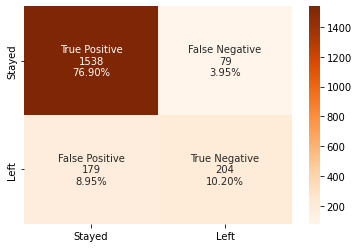

In [51]:
# calculate the confusion matrix 

cm1 = confusion_matrix(y_test, y_pred1)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = ['Stayed', 'Left']

make_confusion_matrix(cm1, group_names=labels, categories=categories, cmap='Oranges')

In [52]:
# generate classification report 

cr1 = metrics.classification_report(y_test, y_pred1)
print(cr1)

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      1617
           1       0.72      0.53      0.61       383

    accuracy                           0.87      2000
   macro avg       0.81      0.74      0.77      2000
weighted avg       0.86      0.87      0.86      2000



#### **Observations**

*   Recall is poor as expected; precision is good.
*   Need to tune model and try other optimizer.
*   Need to find optimal threshold using ROC-AUC curve.


### **Model 2 - Additional Hidden Layers with ADAM Optimizer**

In [53]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [54]:
model2 = Sequential()   # initialize the model
model2.add(Dense(64, activation='relu', input_dim=11))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(16, activation='relu'))
model2.add(Dense(8, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

In [55]:
# compile the ANN with Adam optimizer and binary cross entropy loss function

optimizer = tf.keras.optimizers.Adam(0.001)
model2.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [56]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 3,521
Trainable params: 3,521
Non-trainable params: 0
_________________________________________________________________


In [57]:
history2 = model2.fit(X_train, y_train, batch_size=64, epochs=50, verbose=1, validation_split=0.2)

Epoch 1/50
100/100 [==============================] - 1s 5ms/step - loss: 0.5609 - accuracy: 0.7259 - val_loss: 0.4467 - val_accuracy: 0.8006
Epoch 2/50
100/100 [==============================] - 0s 3ms/step - loss: 0.4337 - accuracy: 0.7959 - val_loss: 0.4164 - val_accuracy: 0.8231
Epoch 3/50
100/100 [==============================] - 0s 3ms/step - loss: 0.3884 - accuracy: 0.8405 - val_loss: 0.3659 - val_accuracy: 0.8512
Epoch 4/50
100/100 [==============================] - 0s 3ms/step - loss: 0.3594 - accuracy: 0.8487 - val_loss: 0.3559 - val_accuracy: 0.8525
Epoch 5/50
100/100 [==============================] - 0s 3ms/step - loss: 0.3499 - accuracy: 0.8527 - val_loss: 0.3526 - val_accuracy: 0.8569
Epoch 6/50
100/100 [==============================] - 0s 3ms/step - loss: 0.3452 - accuracy: 0.8577 - val_loss: 0.3512 - val_accuracy: 0.8556
Epoch 7/50
100/100 [==============================] - 0s 3ms/step - loss: 0.3397 - accuracy: 0.8575 - val_loss: 0.3531 - val_accuracy: 0.8562
Epoch 

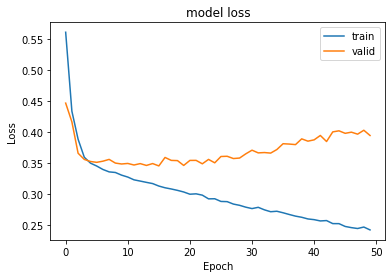

In [58]:
# plot Train Loss vs Validation Loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'valid'], loc=0)
plt.show()

Best Threshold=0.122487, G-Mean=0.749


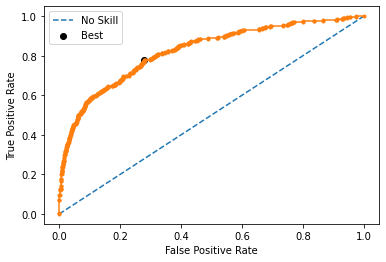

In [59]:
# predict probabilities
yhat2 = model2.predict(X_test)
# keep probabilities for the positive outcome only
yhat2 = yhat2[:, 0]
# calculate roc curves
fpr, tpr, thresholds2 = roc_curve(y_test, yhat2)
# calculate the g-mean for each threshold
gmeans2 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans2)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds2[ix], gmeans2[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [60]:
# predict the results using best threshold
y_pred2 = model2.predict(X_test)
y_pred2 = (y_pred2 > thresholds2[ix])
y_pred2

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

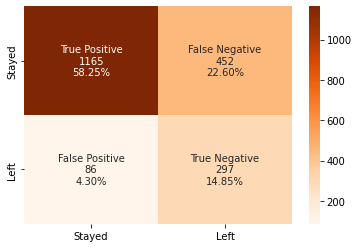

In [61]:
# calculate the confusion matrix 

cm2 = confusion_matrix(y_test, y_pred2)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = ['Stayed', 'Left']

make_confusion_matrix(cm2, group_names=labels, categories=categories, cmap='Oranges')

In [62]:
# generate classification report 

cr2 = metrics.classification_report(y_test, y_pred2)
print(cr2)

              precision    recall  f1-score   support

           0       0.93      0.72      0.81      1617
           1       0.40      0.78      0.52       383

    accuracy                           0.73      2000
   macro avg       0.66      0.75      0.67      2000
weighted avg       0.83      0.73      0.76      2000



#### **Observations**

*   Recall score improved a lot.
*   However validation loss is trending upwards which means the model seems to be overfitting. 
*   Let's try reducing hidden layers and introduce weight initialization and regularization.

### **Model 3 - Batch Normalization with ADAM Optimizer**

In [63]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [64]:
model3 = Sequential()   # initialize the model
model3.add(Dense(16, activation='relu', input_dim=11))
model3.add(BatchNormalization())
model3.add(Dense(8, activation='relu', kernel_initializer='he_uniform'))
model3.add(Dense(1, activation='sigmoid'))

In [65]:
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                192       
                                                                 
 batch_normalization (BatchN  (None, 16)               64        
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 401
Trainable params: 369
Non-trainable params: 32
_________________________________________________________________


In [66]:
optimizer = tf.keras.optimizers.Adam(0.001)
model3.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [67]:
history3 = model3.fit(X_train, y_train, batch_size=64, epochs=50, verbose=1, validation_split=0.2)

Epoch 1/50
100/100 [==============================] - 1s 4ms/step - loss: 0.5299 - accuracy: 0.7761 - val_loss: 0.5065 - val_accuracy: 0.7869
Epoch 2/50
100/100 [==============================] - 0s 3ms/step - loss: 0.4671 - accuracy: 0.7958 - val_loss: 0.4522 - val_accuracy: 0.7975
Epoch 3/50
100/100 [==============================] - 0s 3ms/step - loss: 0.4450 - accuracy: 0.8002 - val_loss: 0.4310 - val_accuracy: 0.8019
Epoch 4/50
100/100 [==============================] - 0s 3ms/step - loss: 0.4271 - accuracy: 0.8081 - val_loss: 0.4125 - val_accuracy: 0.8075
Epoch 5/50
100/100 [==============================] - 0s 3ms/step - loss: 0.4121 - accuracy: 0.8169 - val_loss: 0.3987 - val_accuracy: 0.8194
Epoch 6/50
100/100 [==============================] - 0s 3ms/step - loss: 0.3978 - accuracy: 0.8258 - val_loss: 0.3865 - val_accuracy: 0.8263
Epoch 7/50
100/100 [==============================] - 0s 3ms/step - loss: 0.3862 - accuracy: 0.8320 - val_loss: 0.3766 - val_accuracy: 0.8306
Epoch 

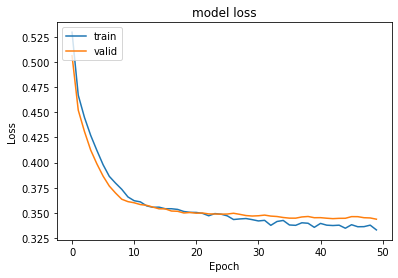

In [68]:
# plot Train Loss vs Validation Loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

Best Threshold=0.228985, G-Mean=0.776


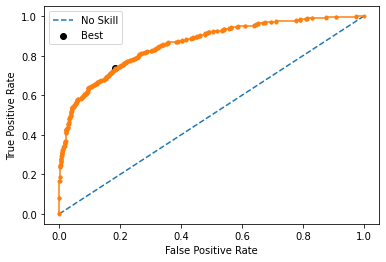

In [69]:
# predict probabilities
yhat3 = model3.predict(X_test)
# keep probabilities for the positive outcome only
yhat3 = yhat3[:, 0]
# calculate roc curves
fpr, tpr, thresholds3 = roc_curve(y_test, yhat3)
# calculate the g-mean for each threshold
gmeans3 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans3)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds3[ix], gmeans3[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [70]:
# predict the results using best threshold

y_pred3 = model3.predict(X_test)
y_pred3 = (y_pred3 > thresholds3[ix])
y_pred3

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

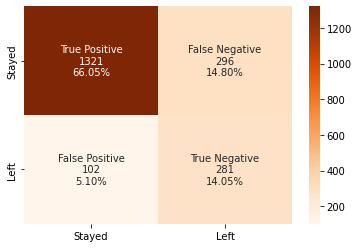

In [71]:
# calculate the confusion matrix 

cm3 = confusion_matrix(y_test, y_pred3)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = ['Stayed', 'Left']

make_confusion_matrix(cm3, group_names=labels, categories=categories, cmap='Oranges')

In [72]:
# generate classification report 

cr3 = metrics.classification_report(y_test, y_pred3)
print(cr3)

              precision    recall  f1-score   support

           0       0.93      0.82      0.87      1617
           1       0.49      0.73      0.59       383

    accuracy                           0.80      2000
   macro avg       0.71      0.78      0.73      2000
weighted avg       0.84      0.80      0.81      2000



#### **Observations**

*   Recall score decreased from previous model. 
*   Validation loss is tracking closely with train loss.
*   Lets see if we can improve performance with Dropout.



### **Model 4 - Dropout with ADAM Optimizer**

In [73]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [74]:
model4 = Sequential()   # initialize the model
model4.add(Dense(16, activation='relu', input_dim=11))
model4.add(Dropout(0.2))
model4.add(Dense(8, activation='relu'))
model4.add(Dense(1, activation='sigmoid'))

In [75]:
model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                192       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________


In [76]:
optimizer = tf.keras.optimizers.Adam(0.001)
model4.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [77]:
history4 = model4.fit(X_train, y_train, batch_size=64, epochs=50, verbose=1, validation_split=0.2)

Epoch 1/50
100/100 [==============================] - 1s 3ms/step - loss: 0.5570 - accuracy: 0.7681 - val_loss: 0.4993 - val_accuracy: 0.8006
Epoch 2/50
100/100 [==============================] - 0s 2ms/step - loss: 0.5044 - accuracy: 0.7922 - val_loss: 0.4600 - val_accuracy: 0.8000
Epoch 3/50
100/100 [==============================] - 0s 2ms/step - loss: 0.4730 - accuracy: 0.7939 - val_loss: 0.4417 - val_accuracy: 0.8025
Epoch 4/50
100/100 [==============================] - 0s 3ms/step - loss: 0.4554 - accuracy: 0.8000 - val_loss: 0.4284 - val_accuracy: 0.8081
Epoch 5/50
100/100 [==============================] - 0s 3ms/step - loss: 0.4447 - accuracy: 0.8022 - val_loss: 0.4212 - val_accuracy: 0.8112
Epoch 6/50
100/100 [==============================] - 0s 3ms/step - loss: 0.4402 - accuracy: 0.8052 - val_loss: 0.4142 - val_accuracy: 0.8175
Epoch 7/50
100/100 [==============================] - 0s 3ms/step - loss: 0.4326 - accuracy: 0.8061 - val_loss: 0.4085 - val_accuracy: 0.8213
Epoch 

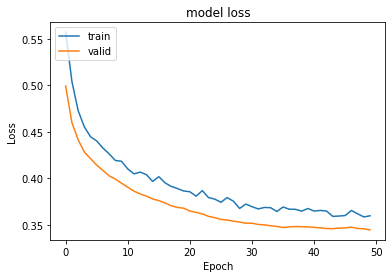

In [78]:
# plot Train Loss vs Validation Loss
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

Best Threshold=0.209371, G-Mean=0.786


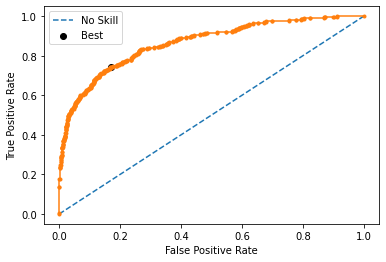

In [79]:
# predict probabilities
yhat4 = model4.predict(X_test)
# keep probabilities for the positive outcome only
yhat4 = yhat4[:, 0]
# calculate roc curves
fpr, tpr, thresholds4 = roc_curve(y_test, yhat4)
# calculate the g-mean for each threshold
gmeans4 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans4)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds3[ix], gmeans4[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [80]:
# predict the results using best threshold

y_pred4 = model4.predict(X_test)
y_pred4 = (y_pred4 > thresholds4[ix])
y_pred4

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

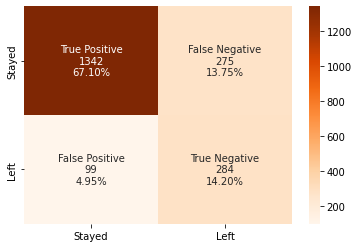

In [81]:
# calculate the confusion matrix 

cm4 = confusion_matrix(y_test, y_pred4)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = ['Stayed', 'Left']

make_confusion_matrix(cm4, group_names=labels, categories=categories, cmap='Oranges')

In [82]:
# generate classification report 

cr4 = metrics.classification_report(y_test, y_pred4)
print(cr4)

              precision    recall  f1-score   support

           0       0.93      0.83      0.88      1617
           1       0.51      0.74      0.60       383

    accuracy                           0.81      2000
   macro avg       0.72      0.79      0.74      2000
weighted avg       0.85      0.81      0.83      2000



#### **Observations**

*   Recall score improved slightly from previous model.
*   Precision and F1 are low however. 
*   Due to the class imbalance lets try SMOTE oversampling to see if that has an impact on performance.

### **Model 5 - SMOTE Oversampling**

In [83]:
# apply SMOTE oversampling technique

from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='not majority')
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [84]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [85]:
model5 = Sequential()   # initialize the model
model5.add(Dense(16, activation='relu', input_dim=11))
model5.add(Dropout(0.2))
model5.add(Dense(8, activation='relu'))
model5.add(Dense(1, activation='sigmoid'))

In [86]:
model5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                192       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________


In [87]:
optimizer = tf.keras.optimizers.Adam(0.001)
model5.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [88]:
history5 = model5.fit(X_train_sm, y_train_sm, batch_size=64, epochs=50, verbose=1, validation_split=0.2)

Epoch 1/50
159/159 [==============================] - 1s 4ms/step - loss: 0.6428 - accuracy: 0.6308 - val_loss: 0.7870 - val_accuracy: 0.4242
Epoch 2/50
159/159 [==============================] - 0s 3ms/step - loss: 0.5910 - accuracy: 0.6833 - val_loss: 0.7455 - val_accuracy: 0.5490
Epoch 3/50
159/159 [==============================] - 0s 3ms/step - loss: 0.5638 - accuracy: 0.7073 - val_loss: 0.7038 - val_accuracy: 0.6329
Epoch 4/50
159/159 [==============================] - 0s 3ms/step - loss: 0.5443 - accuracy: 0.7236 - val_loss: 0.6870 - val_accuracy: 0.6558
Epoch 5/50
159/159 [==============================] - 0s 3ms/step - loss: 0.5293 - accuracy: 0.7372 - val_loss: 0.7001 - val_accuracy: 0.6455
Epoch 6/50
159/159 [==============================] - 0s 3ms/step - loss: 0.5182 - accuracy: 0.7454 - val_loss: 0.6696 - val_accuracy: 0.6605
Epoch 7/50
159/159 [==============================] - 0s 3ms/step - loss: 0.5168 - accuracy: 0.7456 - val_loss: 0.6274 - val_accuracy: 0.6885
Epoch 

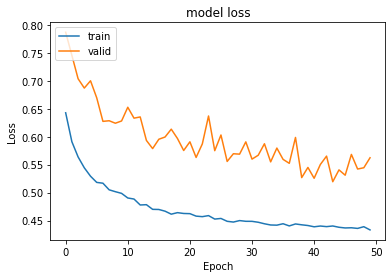

In [89]:
# plot Train Loss vs Validation Loss
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

Best Threshold=0.209371, G-Mean=0.786


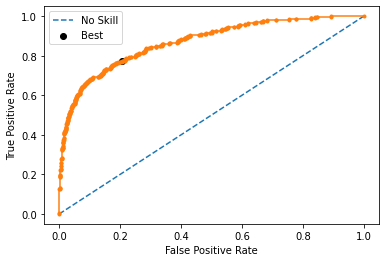

In [90]:
# predict probabilities
yhat5 = model5.predict(X_test)
# keep probabilities for the positive outcome only
yhat5 = yhat5[:, 0]
# calculate roc curves
fpr, tpr, thresholds5 = roc_curve(y_test, yhat5)
# calculate the g-mean for each threshold
gmeans5 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans4)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds3[ix], gmeans4[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [91]:
# predict the results using best threshold

y_pred5 = model5.predict(X_test)
y_pred5 = (y_pred5 > thresholds5[ix])
y_pred5

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

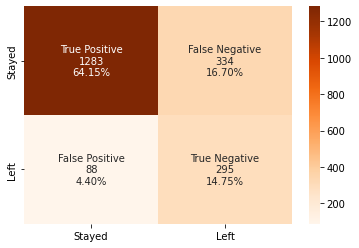

In [92]:
# calculate the confusion matrix 

cm5 = confusion_matrix(y_test, y_pred5)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = ['Stayed', 'Left']

make_confusion_matrix(cm5, group_names=labels, categories=categories, cmap='Oranges')

In [93]:
# generate classification report 

cr5 = metrics.classification_report(y_test, y_pred5)
print(cr5)

              precision    recall  f1-score   support

           0       0.94      0.79      0.86      1617
           1       0.47      0.77      0.58       383

    accuracy                           0.79      2000
   macro avg       0.70      0.78      0.72      2000
weighted avg       0.85      0.79      0.81      2000



#### **Observations**

*   Recall score improve even more slightly after SMOTE oversampling.
*   Also validation loss is much higher than training loss which indicates overfitting. 

## **Conclusion**

### **Insights**

*   Model 4 exhibited good overall performance in terms of Recall and minimizing validation loss. 
*   Building a simpler neural network with dropout regularization seemed to deliver a more effective model.
*   Adding more hidden layers and nodes led to increasing validation loss and which meant overfitting.
*   Oversampling also led to higher validation loss and overfitting.

### **Recommendations**

*   It is evident that higher activity would translate to lower churn rates. Therefore Bank should increase the promotion of enticing offers and schemes to drive customer interest, adoption and, most importantly, retention.

*   Promotions can be in the form of signup bonuses, no/low interest schemes, balance transfers, card category upgrades, travel perks, and reward structures based on cash back, points or miles.

*   Another way would be to routinely increase credit card limits, which would encourage customers to make larger purchases and maintain higher balances.

*   Looking at the bigger picture, Bank should attempt to frequently connect with the customer on a more individual and personal level. Improving the customer journey will strengthen the relationship with the bank, thereby increasing retention.